# Урок 2. Keras

## Практическое задание

## Используем набор примеров fashion-MNIST

### 1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.

In [1]:
from keras import models as m
from keras.datasets import fashion_mnist
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)
(60000,)


In [3]:
scaler = MinMaxScaler()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

X_train_norm.min(), X_train_norm.max(), X_test_norm.min(), X_test_norm.max()

(0.0, 1.0, 0.0, 1.8319327731092436)

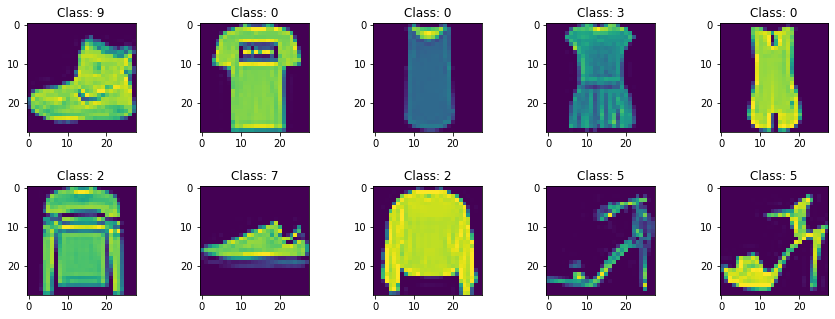

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(15,5))          
ax = axes.ravel()
for i in range(10):
    ax[i].imshow(X_train[i].reshape(28,28))
    ax[i].title.set_text('Class: ' + str(y_train[i]))              
plt.subplots_adjust(hspace=0.5)                                    
plt.show() #стоит разобраться как отображаются данные оработанные scaler'ом

In [5]:
model = Sequential()

model.add(Dense(64, input_shape=(784,), activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
history = model.fit(X_train_norm, y_train,
                    epochs=5,
                    batch_size=10, 
                    verbose=1)

Epoch 1/5
6000/6000 [==============================] - 16s 3ms/step - loss: 0.5981 - accuracy: 0.7968
Epoch 2/5
6000/6000 [==============================] - 8s 1ms/step - loss: 0.4482 - accuracy: 0.8427
Epoch 3/5
6000/6000 [==============================] - 8s 1ms/step - loss: 0.4130 - accuracy: 0.8547
Epoch 4/5
6000/6000 [==============================] - 8s 1ms/step - loss: 0.3908 - accuracy: 0.8621
Epoch 5/5
6000/6000 [==============================] - 8s 1ms/step - loss: 0.3735 - accuracy: 0.8674


In [9]:
def loss_acc(h):
  fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,5))
  ax = axes.ravel()
  ax[0].plot(h.history['loss'])
  ax[0].title.set_text('Loss vs epoch')
  ax[1].plot(h.history['accuracy'])       
  ax[1].title.set_text('Accuracy vs epoch')                            
  plt.show()

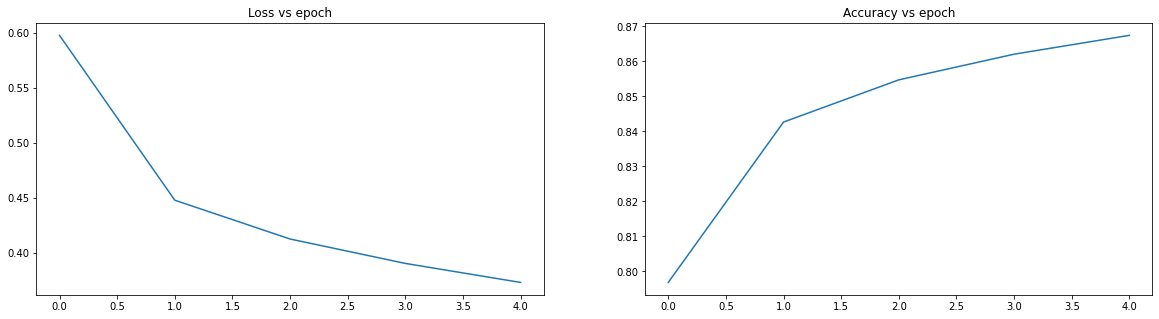

In [10]:
loss_acc(history)

#### Исследование по числу нейронов

16


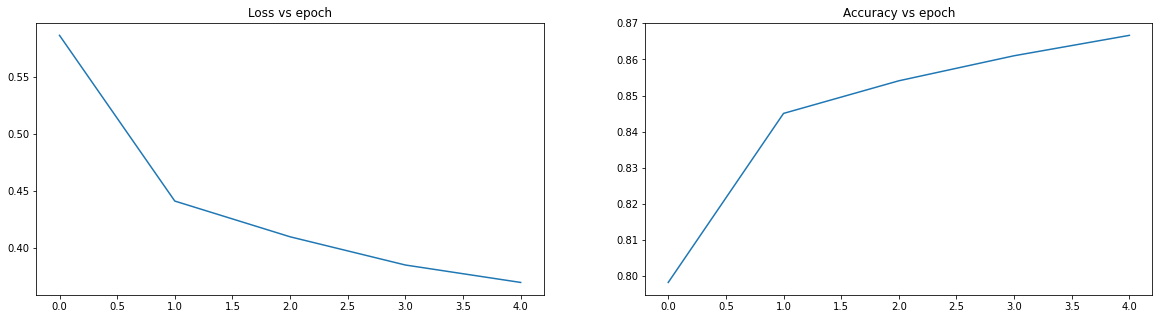

32


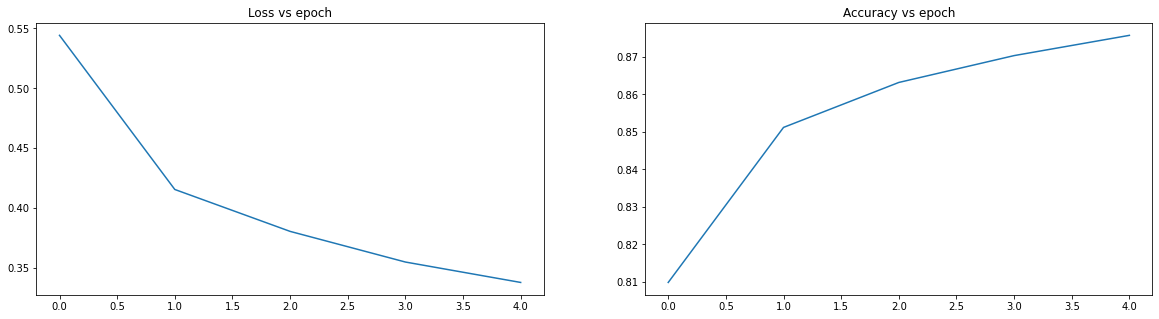

64


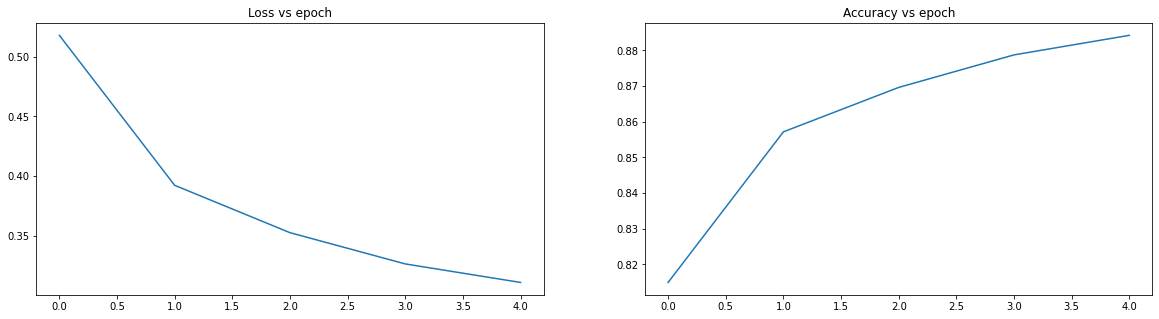

128


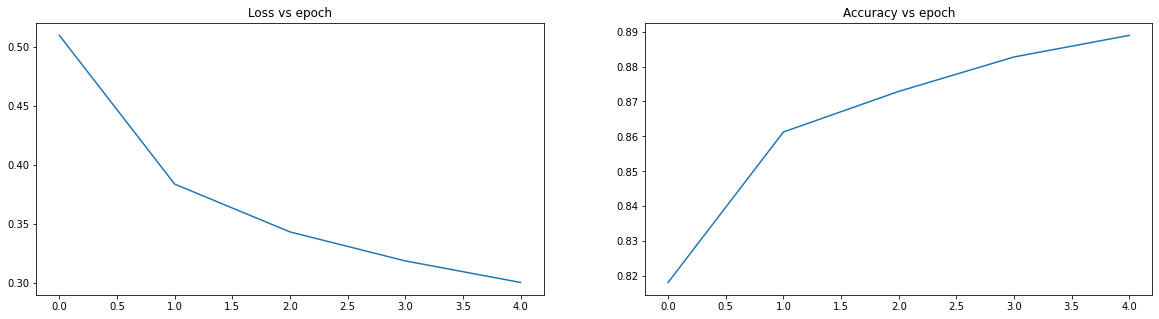

In [11]:
results = []
for neurons in [16, 32, 64, 128]:
    model = Sequential()
    model.add(Dense(neurons, input_shape=(784,), activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(X_train_norm, y_train,
                        epochs=5,
                        batch_size=10,
                        validation_split=0.3,
                        verbose=0)
    results.append(history.history)
    print(neurons)
    loss_acc(history)

#### Исследование по числу слоев

In [12]:
layers = [
    [
        Dense(64, input_shape=(784,), activation='relu'),
        Dense(10, activation='softmax'),
    ],
    [
        Dense(64, input_shape=(784,), activation='relu'),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax'),
    ],
    [
        Dense(64, input_shape=(784,), activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(10, activation='softmax'),
    ],
    [
        Dense(64, input_shape=(784,), activation='relu'),
        Dense(32, activation='relu'),
        Dense(24, activation='relu'),
        Dense(16, activation='relu'),
        Dense(10, activation='softmax'),
    ],
    [
        Dense(64, input_shape=(784,), activation='relu'),
        Dense(32, activation='relu'),
        Dense(24, activation='relu'),
        Dense(16, activation='relu'),
        Dense(15, activation='relu'),
        Dense(14, activation='relu'),
        Dense(13, activation='relu'),
        Dense(12, activation='relu'),
        Dense(11, activation='relu'),
        Dense(10, activation='softmax'),
    ]
]

2


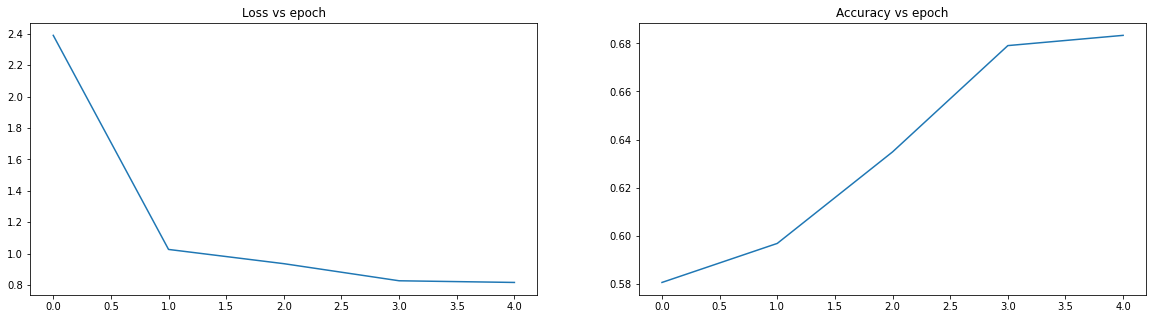

3


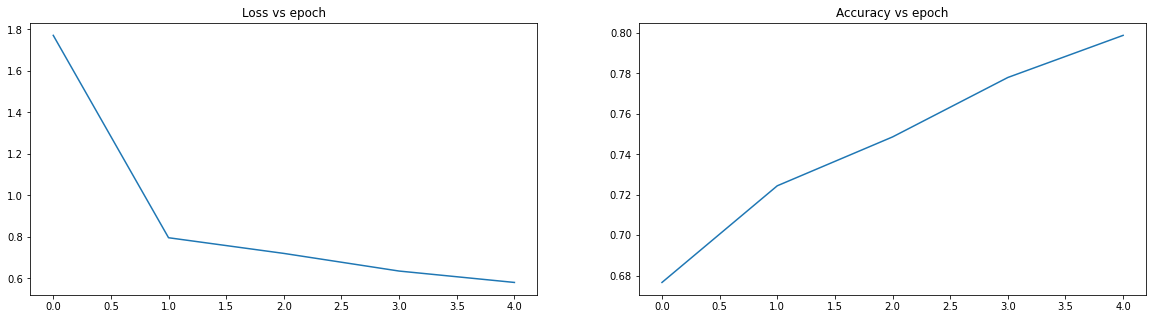

4


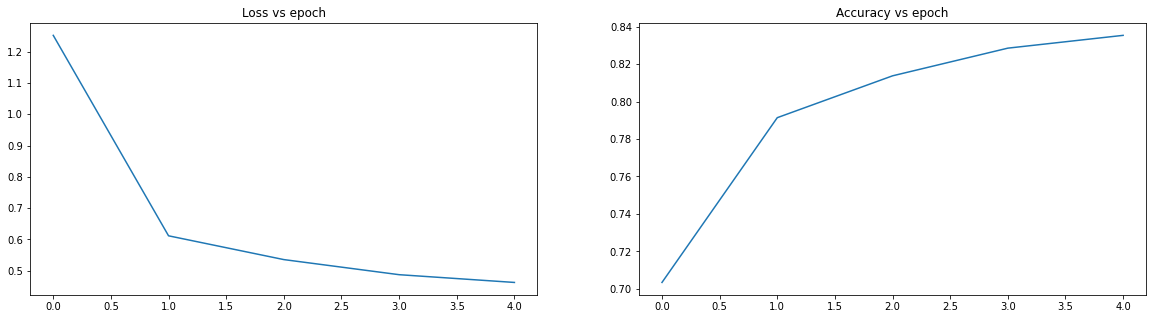

5


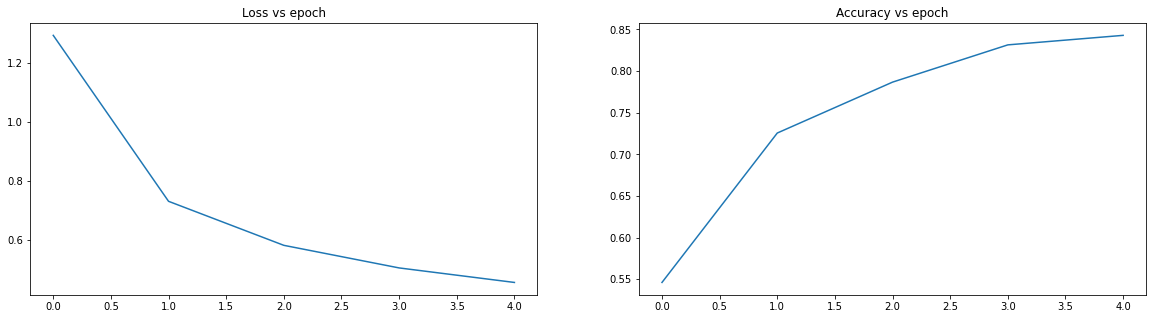

10


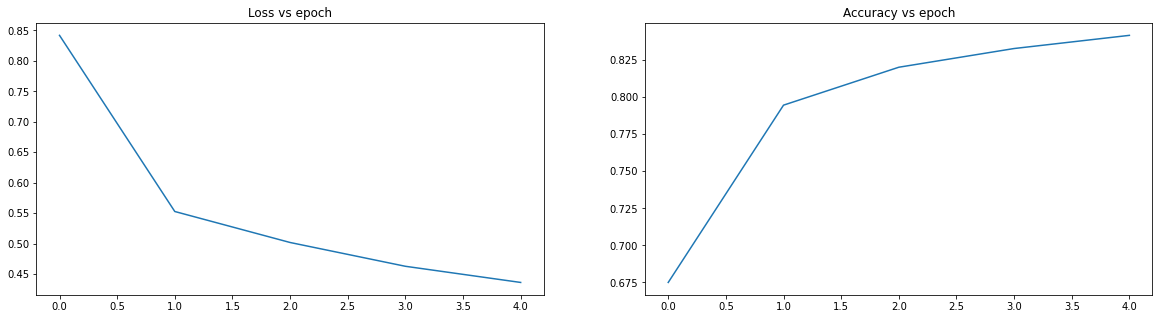

In [13]:
for l in layers:
    model = Sequential(l)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(X_train, y_train,
                        epochs=5,
                        batch_size=10,
                        validation_split=0.3,
                        verbose=0)
    results.append(history.history)
    print(len(l))
    loss_acc(history)

In [14]:
pd_compare = pd.DataFrame({
    'neurons>10 or layers<=10': [16, 32, 64, 128, 2, 3, 4, 5, 10],
    'loss': [round(min(result['loss']), 3) for result in results],
    'accuracy': [round(max(result['accuracy']), 3) for result in results],
    'val_loss': [round(min(result['val_loss']), 3) for result in results],
    'val_accuracy': [round(max(result['val_accuracy']), 3) for result in results]
})
pd_compare = pd_compare.style.set_table_styles([dict(selector="th",props=[('max-width', '55px')])])
pd_compare

,neurons>10 or layers<=10,loss,accuracy,val_loss,val_accuracy
0,16,0.370000,0.867000,0.396000,0.859000
1,32,0.338000,0.876000,0.380000,0.863000
2,64,0.311000,0.884000,0.353000,0.878000
3,128,0.300000,0.889000,0.340000,0.881000
4,2,0.816000,0.683000,0.813000,0.695000
5,3,0.581000,0.799000,0.577000,0.803000
6,4,0.462000,0.835000,0.520000,0.808000
7,5,0.456000,0.843000,0.474000,0.845000
8,10,0.436000,0.842000,0.468000,0.832000


Как видно из таблицы, изменение количества нейронов чуть лучше влияет на поведение модели. Видно, что черезмерное количество нейронов не принесет существенного улучшения, поэтому для изучения влияния количества слове было выбрано 64 нейронная сеть.  
Как видно из изменения количества слоев. метрика 'loss' даже не приблизилась к метрикам в тестах с количеством нейронов, метрика 'accuracy' показывает более приемлемую динамику.  
Из проведенных опытов можно сделать заключение, что манипулирование количеством слове недостаточноые настройки для получения необходимых результатов.

### 2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

In [15]:
model = Sequential()

model.add(Dense(64, input_shape=(784,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.save('./task_2.h5')

In [16]:

opt = ['sgd', 'adagrad', 'rmsprop', 'adam', 'adadelta', 'adamax', 'ftrl', 'nadam']

results = []

for o in opt:
  model = m.load_model('./task_2.h5')

  model.compile(optimizer=o,
                loss='categorical_crossentropy',
                metrics=['accuracy'],
                )
  
  history = model.fit(X_train_norm, y_train,
                      epochs=5,
                      batch_size=10,
                      validation_split=0.3,
                      verbose=0)
  
  results.append(history.history)
  print(o, end=' ')

sgd WARNING:tensorflow:No training configuration found in the save file, so the model was *not* compiled. Compile it manually.
adagrad WARNING:tensorflow:No training configuration found in the save file, so the model was *not* compiled. Compile it manually.
rmsprop WARNING:tensorflow:No training configuration found in the save file, so the model was *not* compiled. Compile it manually.
adam WARNING:tensorflow:No training configuration found in the save file, so the model was *not* compiled. Compile it manually.
adadelta WARNING:tensorflow:No training configuration found in the save file, so the model was *not* compiled. Compile it manually.
adamax WARNING:tensorflow:No training configuration found in the save file, so the model was *not* compiled. Compile it manually.
ftrl WARNING:tensorflow:No training configuration found in the save file, so the model was *not* compiled. Compile it manually.
nadam 

In [17]:
pd_compare = pd.DataFrame({
    'optimizer': opt,
    'loss': [round(min(result['loss']), 3) for result in results],
    'accuracy': [round(max(result['accuracy']), 3) for result in results],
    'val_loss': [round(min(result['val_loss']), 3) for result in results],
    'val_accuracy': [round(max(result['val_accuracy']), 3) for result in results]
})

pd_compare

,optimizer,loss,accuracy,val_loss,val_accuracy
0,sgd,0.362,0.868,0.366,0.869
1,adagrad,0.662,0.788,0.647,0.792
2,rmsprop,0.438,0.855,0.417,0.858
3,adam,0.331,0.877,0.355,0.873
4,adadelta,1.936,0.367,1.901,0.371
5,adamax,0.365,0.870,0.371,0.865
6,ftrl,2.303,0.101,2.303,0.098
7,nadam,0.323,0.879,0.357,0.871


### 3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

- умеренное количество нейронов;
- умеренное количество слоев;
- правильно выбранный оптимизатор.

### 4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

In [18]:
model.optimizer.get_config()

{'beta_1': 0.9,
 'beta_2': 0.999,
 'decay': 0.004,
 'epsilon': 1e-07,
 'learning_rate': 0.001,
 'name': 'Nadam'}

In [19]:
y_pred = model.predict(X_test_norm)

[Text(0, 0.5, '0'),
 Text(0, 1.5, '1'),
 Text(0, 2.5, '2'),
 Text(0, 3.5, '3'),
 Text(0, 4.5, '4'),
 Text(0, 5.5, '5'),
 Text(0, 6.5, '6'),
 Text(0, 7.5, '7'),
 Text(0, 8.5, '8'),
 Text(0, 9.5, '9')]

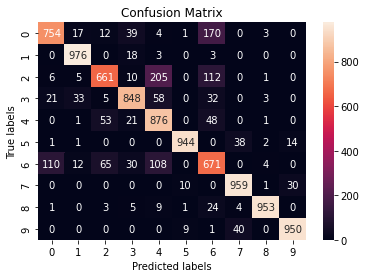

In [26]:
import seaborn as sns

ax= plt.subplot()

cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(np.arange(10))
ax.yaxis.set_ticklabels(np.arange(10))

In [32]:
def analyze_cm(label, c_matrix):
    str_sum = 0
    col_sum = 0
    for i in range(len(c_matrix)):
        str_sum += c_matrix[label][i]
        col_sum += c_matrix[i][label]
        
    return c_matrix[label][label] / str_sum, c_matrix[label][label] / col_sum

In [35]:
final_result = pd.DataFrame()
precisions = []
recalls = []
labels = np.arange(10)
for l in labels:
    get_precisions, get_recalls = analyze_cm(l, cm)
    precisions.append(get_precisions)
    recalls.append(get_recalls)
final_result['label'] = labels
final_result['precision'] = precisions
final_result['recall'] = recalls

final_result

,label,precision,recall
0,0,0.754,0.844345
1,1,0.976,0.933971
2,2,0.661,0.827284
3,3,0.848,0.873326
4,4,0.876,0.693587
5,5,0.944,0.978238
6,6,0.671,0.632422
7,7,0.959,0.921230
8,8,0.953,0.984504
9,9,0.950,0.955734
